# notebook for spaceship-titanic competition

By: [Undefined](https://www.kaggle.com/oklats)

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# import data
df = pd.read_csv('datasets/spaceship-titanic/train.csv')
df.sample(5)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
4137,4415_01,Mars,False,F/833/S,TRAPPIST-1e,45.0,False,941.0,281.0,36.0,12.0,39.0,Froon Parta,False
1338,1417_01,Europa,False,C/54/S,TRAPPIST-1e,41.0,False,0.0,184.0,0.0,1520.0,3358.0,Alik Spedlinale,False
7658,8168_06,Earth,False,G/1316/S,TRAPPIST-1e,18.0,False,0.0,858.0,2.0,NaN,0.0,Camina Carpentley,True
3428,3699_02,Europa,False,C/123/P,55 Cancri e,25.0,NaN,0.0,17432.0,0.0,241.0,2102.0,Gorab Tronsive,True
4573,4874_02,Mars,True,F/925/S,TRAPPIST-1e,18.0,False,0.0,0.0,0.0,0.0,0.0,Cruses Cusa,True


In [6]:
# check for missing values
df.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
df.shape

(8693, 14)

<AxesSubplot:>

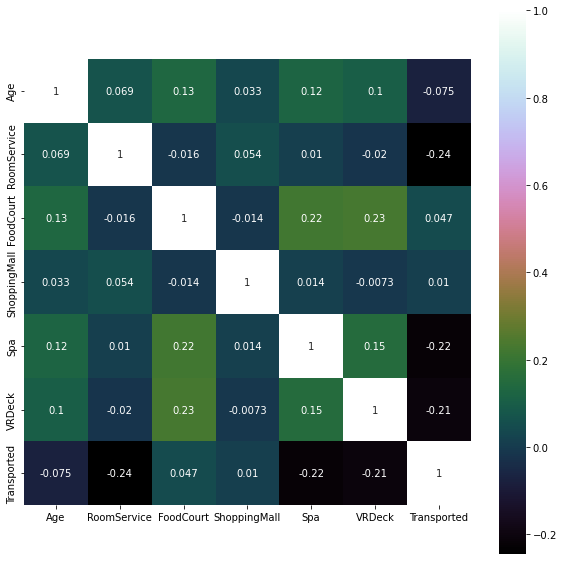

In [10]:
# correlation matrix
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, vmax=1, square=True, annot=True, cmap='cubehelix')

<AxesSubplot:>

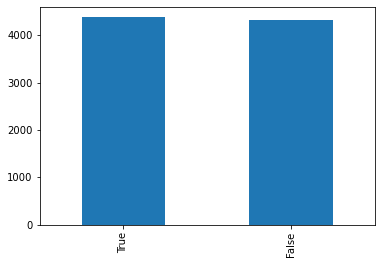

In [12]:
df['Transported'].value_counts().plot(kind='bar')

In [13]:
df.sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
3416,3681_01,Europa,True,B/144/S,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Tarrak Irived,True
395,0435_01,Earth,True,G/62/S,TRAPPIST-1e,17.0,False,0.0,0.0,0.0,0.0,0.0,Allie Willynnedy,True
1209,1288_01,Earth,False,G/192/P,TRAPPIST-1e,24.0,False,621.0,0.0,0.0,0.0,0.0,Nance Flemaney,False
5603,5965_01,Earth,False,G/964/P,TRAPPIST-1e,22.0,False,0.0,40.0,689.0,0.0,79.0,Ricke Beckerson,True
821,0874_01,Earth,False,F/165/S,TRAPPIST-1e,19.0,False,0.0,162.0,540.0,0.0,0.0,Breney Briggston,False


In [14]:
# drop columns
df = df.drop(['PassengerId', 'Name', 'Cabin'], axis=1)

In [15]:
df.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
Transported       0
dtype: int64

In [17]:
# complete missing values
df['CryoSleep'].fillna(df['CryoSleep'].mode()[0], inplace=True)
df['ShoppingMall'].fillna(df['ShoppingMall'].mode()[0], inplace=True)
df['VIP'].fillna(df['VIP'].mode()[0], inplace=True)
df['HomePlanet'].fillna(df['HomePlanet'].mode()[0], inplace=True)
df['VRDeck'].fillna(df['VRDeck'].mode()[0], inplace=True)
df['FoodCourt'].fillna(df['FoodCourt'].mode()[0], inplace=True)
df['Spa'].fillna(df['Spa'].mode()[0], inplace=True)
df['Destination'].fillna(df['Destination'].mode()[0], inplace=True)
df['RoomService'].fillna(df['RoomService'].mode()[0], inplace=True)
df['Age'].fillna(df['Age'].mode()[0], inplace=True)





In [18]:
df.sample(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
2387,Mars,True,TRAPPIST-1e,24.0,False,0.0,0.0,0.0,0.0,0.0,True
5955,Earth,False,55 Cancri e,64.0,False,0.0,316.0,2.0,673.0,0.0,False
2577,Earth,False,55 Cancri e,15.0,False,254.0,0.0,10.0,180.0,0.0,False
8385,Mars,False,TRAPPIST-1e,28.0,False,1708.0,0.0,65.0,1.0,0.0,False
8511,Earth,False,TRAPPIST-1e,48.0,False,0.0,586.0,784.0,4.0,21.0,True


In [19]:
df.isnull().sum().sort_values(ascending=False)

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [21]:
# get all categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['HomePlanet', 'Destination'], dtype='object')

In [22]:

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for col in cat_cols:
    df[col] = labelencoder.fit_transform(df[col])

In [23]:
# get all numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['HomePlanet', 'Destination', 'Age', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')

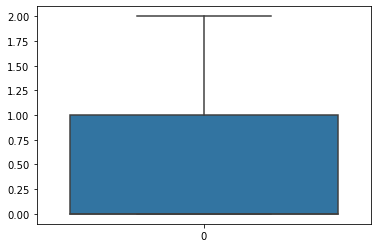

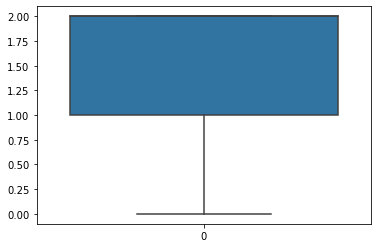

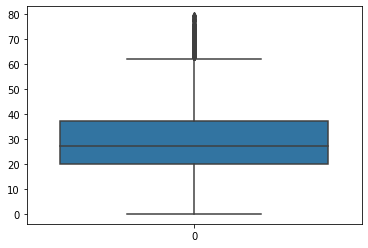

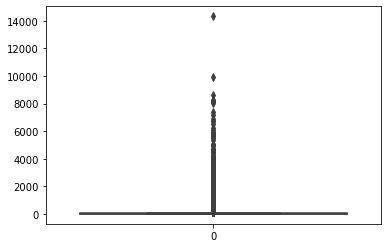

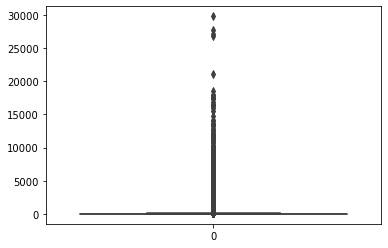

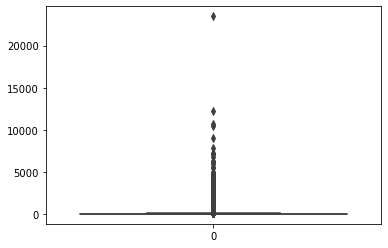

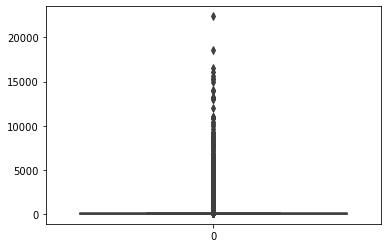

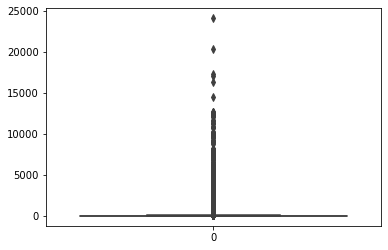

In [24]:
# check for outliers
for col in num_cols:
    sns.boxplot(df[col])
    plt.show()

In [25]:
# remove outliers
from scipy import stats
z = np.abs(stats.zscore(df[num_cols]))
df = df[(z < 3).all(axis=1)]


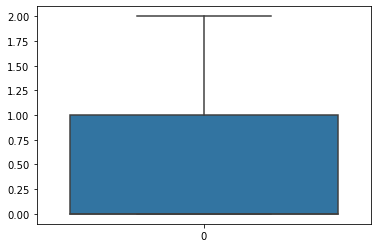

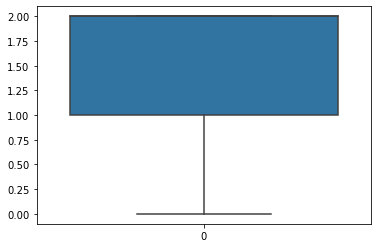

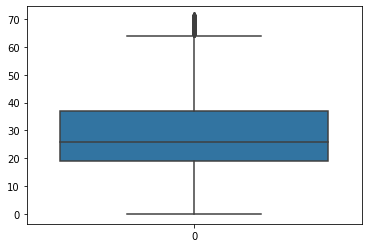

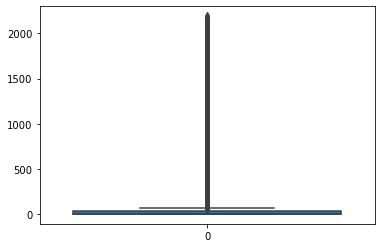

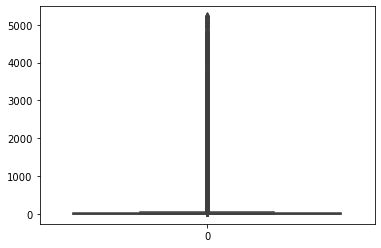

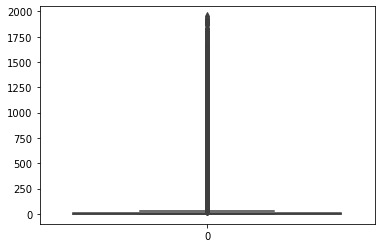

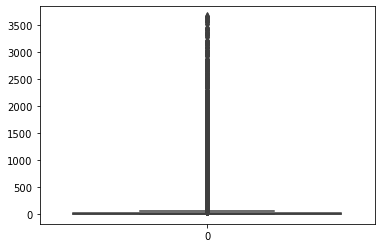

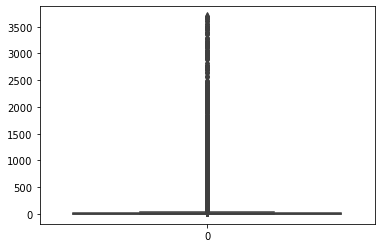

In [26]:
# check for outliers
for col in num_cols:
    sns.boxplot(df[col])
    plt.show()
    

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x = df.drop('Transported', axis=1)
y = df['Transported']

# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# train model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [29]:
# predict
y_pred = model.predict(x_test)


In [30]:
# check accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.7884130982367759

<AxesSubplot:>

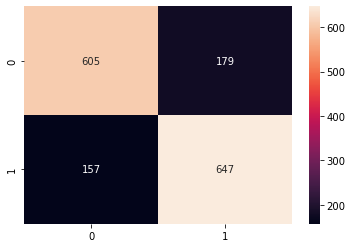

In [31]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')


In [32]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.79      0.77      0.78       784
        True       0.78      0.80      0.79       804

    accuracy                           0.79      1588
   macro avg       0.79      0.79      0.79      1588
weighted avg       0.79      0.79      0.79      1588



In [37]:
# predict on test data
df_test = pd.read_csv('datasets/spaceship-titanic/test.csv')
df_test.sample(5)
passenger_id = df_test['PassengerId']


In [38]:
df_test = df_test.drop(['PassengerId', 'Name', 'Cabin'], axis=1)
df_test['CryoSleep'].fillna(df_test['CryoSleep'].mode()[0], inplace=True)
df_test['ShoppingMall'].fillna(df_test['ShoppingMall'].mode()[0], inplace=True)
df_test['VIP'].fillna(df_test['VIP'].mode()[0], inplace=True)
df_test['HomePlanet'].fillna(df_test['HomePlanet'].mode()[0], inplace=True)
df_test['VRDeck'].fillna(df_test['VRDeck'].mode()[0], inplace=True)
df_test['FoodCourt'].fillna(df_test['FoodCourt'].mode()[0], inplace=True)
df_test['Spa'].fillna(df_test['Spa'].mode()[0], inplace=True)
df_test['Destination'].fillna(df_test['Destination'].mode()[0], inplace=True)
df_test['RoomService'].fillna(df_test['RoomService'].mode()[0], inplace=True)
df_test['Age'].fillna(df_test['Age'].mode()[0], inplace=True)

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for col in cat_cols:
    df_test[col] = labelencoder.fit_transform(df_test[col])

In [39]:
df_test.sample(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
1151,0,True,2,0.0,False,0.0,0.0,0.0,0.0,0.0
835,2,False,2,20.0,False,532.0,0.0,747.0,10.0,0.0
3313,0,False,2,40.0,False,0.0,0.0,0.0,292.0,1334.0
3947,1,True,0,23.0,False,0.0,0.0,0.0,0.0,0.0
3102,0,False,2,46.0,False,0.0,445.0,8.0,146.0,0.0


In [40]:
# predict
y_pred = model.predict(df_test)


In [43]:
# create submission file
submission = pd.DataFrame({'PassengerId': passenger_id, 'Transported': y_pred})
submission.to_csv('submisions/spaceship_titanic_submission.csv', index=False)